In [1]:
import numpy as np
import os, sys, librosa
from scipy import signal
from matplotlib import pyplot as plt
import matplotlib 
import IPython.display as ipd
import ssm_utils

This notebook was made with the help of course materials provided during the module Computer Music: Representations and Models at Politecnico di Milano in 2022.

The artwork was created using a Self-Similarity Matrix, a musical analysis technique.

An SSM works by comparing each element of a feature sequence with all other elements, recurring patterns become visible along the diagonal of the picture.

This is useful for identify the musical structure of a piece, helping to identify choruses and verses for example.

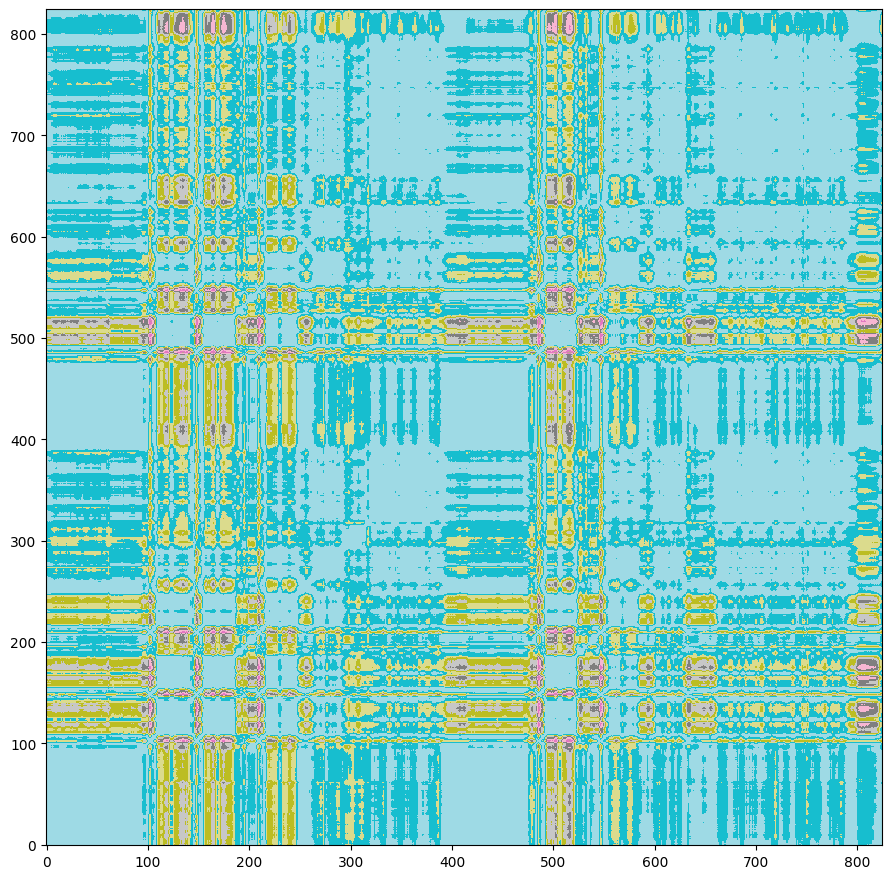

In [3]:
# Import the song audio to create the waveform to be analyzed
fn_wav = os.path.join('data', 'audio', 'baby.wav')
Fs = 22050
x, Fs = librosa.load(fn_wav, sr=Fs) 
x_duration = (x.shape[0])/Fs

# Create the feature sequence using the chromagram formed using the short time fourier transform
# N will be the length of the FFT window, detemines the number of samples in each STFT frame
# H refers to the hop size, determining the overlap of each frame
N, H = 4096, 1024
chromagram = librosa.feature.chroma_stft(y=x, sr=Fs, tuning=0, norm=2, hop_length=H, n_fft=N)

# Downsampling and Normalixing the feature sequence
X, Fs_X = ssm_utils.smooth_downsample_feature_sequence(chromagram, Fs/H, filt_len=41, down_sampling=10)
X = ssm_utils.normalize_feature_sequence(X, norm='2', threshold=0.001)

# Compute the self similarity using the dot product
S = np.dot(np.transpose(X),X)    

# Visualization
plt.figure(figsize=(9, 9))
cmap = matplotlib.colormaps["tab20"]#ssm_utils.compressed_gray_cmap(alpha=-100)
im = plt.imshow(S, aspect='equal', origin='lower', cmap=cmap, vmin=0, vmax=1)
plt.tight_layout()
plt.savefig("BabyIamForRealArtwork.png", format="png", dpi=3000)
plt.show()